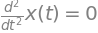

In [2]:
import sympy as sp
sp.init_printing()
g, t, k, v0, theta = sp.symbols("g,t,k,v0,theta")

#Funções
x = sp.Function("x")
y = sp.Function("y")

#Sem resistência

#equação x
eqx = sp.Eq(x(t).diff(t, 2), 0)
eqx

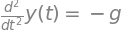

In [31]:
#equação y
eqy = sp.Eq(y(t).diff(t, 2), - g)
eqy

In [32]:
#solução no eixo x
solx = sp.dsolve(eqx, ics={x(0):0, x(t).diff(t, 1).subs(t,0): v0*sp.cos(theta)})
solx

In [33]:
#solução no eixo y
soly = sp.dsolve(eqy, ics={y(0):0, y(t).diff(t,1).subs(t,0): v0*sp.sin(theta)})
soly

Com Resistência do Ar

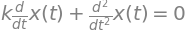

In [34]:
#equação x
eqxr = sp.Eq(x(t).diff(t, 2) + k*x(t).diff(t,1), 0)
eqxr

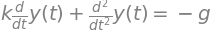

In [35]:
#equação y
eqyr = sp.Eq(y(t).diff(t, 2) + k*y(t).diff(t,1), - g)
eqyr

In [42]:
#solução x
solxr = sp.dsolve(eqxr, ics={x(0):0, x(t).diff(t, 1).subs(t,0): v0*sp.cos(theta)})
solxr

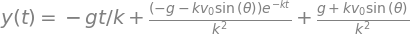

In [41]:
#solução em y
solyr = sp.dsolve(eqyr, ics={y(0):0, y(t).diff(t,1).subs(t,0): v0*sp.sin(theta)})
solyr

Lambdificação e gráficos
k = 0.08, 0.01 e 0
theta = 60
v0 = 600 m/s

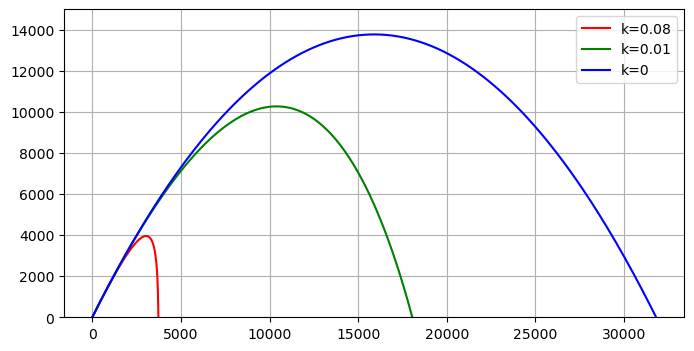

In [55]:
import numpy as np
import matplotlib.pyplot as plt

k1 = 0.08
k2 = 0.01
k3 = 0
tl = np.linspace(0, 106, 200)

### k1
y_tk1 = sp.lambdify(t, solyr.rhs.subs({g:9.8, k:k1, v0:600, theta:np.pi*2/6}), "numpy")
Yp1 = y_tk1(tl)

x_tk1 = x_tk3 = sp.lambdify(t, solxr.rhs.subs({v0:600, k:k1, theta:np.pi*2/6}), "numpy")
Xp1 = x_tk1(tl)
###

### k2
y_tk2 = sp.lambdify(t, solyr.rhs.subs({g:9.8, k:k2, v0:600, theta:np.pi*2/6}), "numpy")
Yp2 = y_tk2(tl)

x_tk2 = sp.lambdify(t, solxr.rhs.subs({v0:600, k:k2, theta:np.pi*2/6}), "numpy")
Xp2 = x_tk2(tl)
###

### k3
y_tk3 = sp.lambdify(t, soly.rhs.subs({g:9.8, v0:600, theta:np.pi*2/6}), "numpy")
Yp3 = y_tk3(tl)

x_tk3 = sp.lambdify(t, solx.rhs.subs({v0:600, theta:np.pi*2/6}), "numpy")
Xp3 = x_tk3(tl)
###


#plot
fig, ax = plt.subplots(figsize=(8,4))
ax.set_ylim(0, 15000)
ax.plot(Xp1, Yp1, color='red', label='k=0.08')
ax.plot(Xp2, Yp2, color='green', label='k=0.01')
ax.plot(Xp3, Yp3, color='blue', label='k=0')
plt.legend()
plt.grid()
plt.show()